In [ ]:
# INSTALL PACKAGES
%pip install contextily # to give background
%pip install geopandas
%pip install shapely


In [ ]:
# GEODATA 
import pandas as pd
import matplotlib.pyplot as plt

# import data from google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


     |████████████████████████████████| 18.3MB 1.3MB/s 


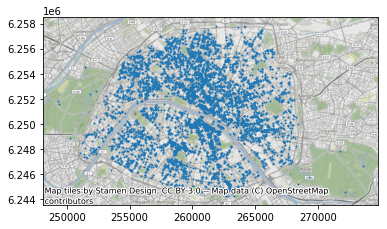

In [ ]:
# PLAIN DATA 
# Read the restaurants csv file
restaurants = pd.read_csv('/content/drive/My Drive/paris_restaurants.csv')

#Adding a background map
import contextily

# A figure of all restaurants with background
fig, ax = plt.subplots()
ax.plot(restaurants.x, restaurants.y, 'o', markersize = 1)
contextily.add_basemap(ax)
plt.show()

                                 type  ...                        geometry
0                 European restuarant  ...  POINT (259641.692 6251867.063)
1       Traditional French restaurant  ...  POINT (259572.340 6252029.683)
2       Traditional French restaurant  ...  POINT (259657.276 6252143.401)
3  Indian / Middle Eastern restaurant  ...  POINT (259684.438 6252203.137)
4       Traditional French restaurant  ...  POINT (259597.943 6252230.044)

[5 rows x 4 columns]


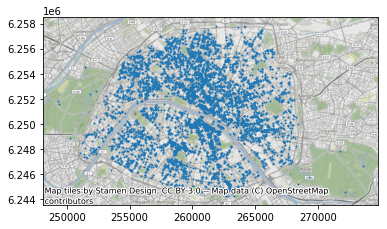

In [ ]:
# GEOPANDAS
import geopandas
# Convert the pandas DataFrame to a GeoDataFrame.
df = geopandas.GeoDataFrame(restaurants, geometry = geopandas.points_from_xy(x = restaurants.x,y = restaurants.y))
print(df.head())

# print a plot of df
ax = df.plot(markersize=1)
contextily.add_basemap(ax)
plt.show()

In [ ]:
# SHAPELY
# Import the Point geometry
from shapely.geometry import Point

# Construct a point object for the Eiffel Tower
eiffel_tower = Point(255422.6,6250868.9)

# Print the result
print(eiffel_tower)

POINT (255422.6 6250868.9)


# How far is the closest restaurant?
Now, we might be interested in the restaurants nearby the Eiffel Tower. To explore them, let's visualize the Eiffel Tower itself as well as the restaurants within 1km.

To do this, we can calculate the distance to the Eiffel Tower for each of the restaurants. Based on this result, we can then create a mask that takes True if the restaurant is within 1km, and False otherwise, and use it to filter the restaurants GeoDataFrame. Finally, we make a visualization of this subset.


460.69760282781715


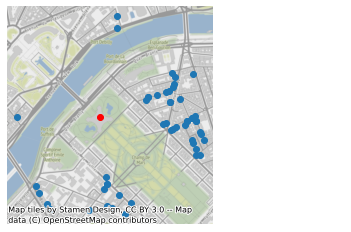

In [ ]:
# The distance from each restaurant to the Eiffel Tower
dist_eiffel = df.distance(eiffel_tower)

# The distance to the closest restaurant
print(dist_eiffel.min())

# Filter the restaurants for closer than 1 km (distance is in meters)
restaurants_eiffel = df[dist_eiffel<1000]

# Make a plot of the close-by restaurants
ax = restaurants_eiffel.plot()
geopandas.GeoSeries([eiffel_tower]).plot(ax=ax, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()


    visit_date  ...                         geometry
0  2013-03-27Z  ...  POINT (796089.416 10111855.174)
1  2013-03-27Z  ...  POINT (795899.664 10110990.840)
2  2013-03-27Z  ...  POINT (795641.707 10109059.787)
3  2013-03-27Z  ...  POINT (794376.309 10110622.250)
4  2013-03-27Z  ...  POINT (796057.504 10105781.548)

[5 rows x 5 columns]
Index(['visit_date', 'name', 'n_workers', 'mineral', 'geometry'], dtype='object')


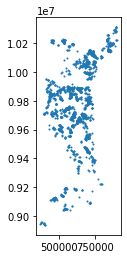

In [ ]:
mines = geopandas.read_file('/content/drive/My Drive/ipis_cod_mines_utm.gpkg')
print(mines.head())
print(mines.columns)
mines.plot(markersize=1)
plt.show()

In [ ]:
# Check what kind of object districts is
print(type(mines))

# Check the type of the geometry attribute
print(type(mines.geometry))

# Inspect the first rows of the geometry
print(mines.geometry.head())

# Inspect the area of the districts
print(mines.geometry.area)

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
0    POINT (796089.416 10111855.174)
1    POINT (795899.664 10110990.840)
2    POINT (795641.707 10109059.787)
3    POINT (794376.309 10110622.250)
4    POINT (796057.504 10105781.548)
Name: geometry, dtype: geometry
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2138    0.0
2139    0.0
2140    0.0
2141    0.0
2142    0.0
Length: 2143, dtype: float64
